As a **data scientist**, the **first** thing you do when dealing with a **raw dataset** is to **explore** and **prepare** the **dataset** for **advanced analysis** or **statistical modeling**.

**Data exploration** consist of **five main steps**:
- **1) Understanding the variables**. In this step, we try to **understand all variables** in our **dataset**. We look at each variable to understand its **meaning** and its **importance** for current problem.
- **2) Exploring the dependent varialbe**. In this step, we will have a deep look at our **target variable** which is the variable that we are trying to **predict**.
- **3) Investigating** the **relationships** between the **dependent variable** and the other **independent variable**. This step also includes **variable selection** where only the **important variables** will be **chosen** for further analysis.
- **4) Data cleaning**. In this step, we **handle missing data**, **outliers**, and **categorical variables**.
- **5) Checking statistical assumptions**. In this step, we **check** if our **data** meet the **assumptions** that are required for **advanced analysis**, for example, checking for **data normality**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Scipy library** is a library for **scientific analysis** with **python**.

# 1. Understanding the Variables

In [2]:
df = pd.read_csv('data/housing.csv')
df.head()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
0,1,8450,7,2003,856,1710,2,3,Gd,8,548,208500
1,2,9600,6,1976,1262,1262,2,3,TA,6,460,181500
2,3,11250,7,2001,920,1786,2,3,Gd,6,608,223500
3,4,9550,7,1915,756,1717,1,3,Gd,7,642,140000
4,5,14260,8,2000,1145,2198,2,4,Gd,9,836,250000


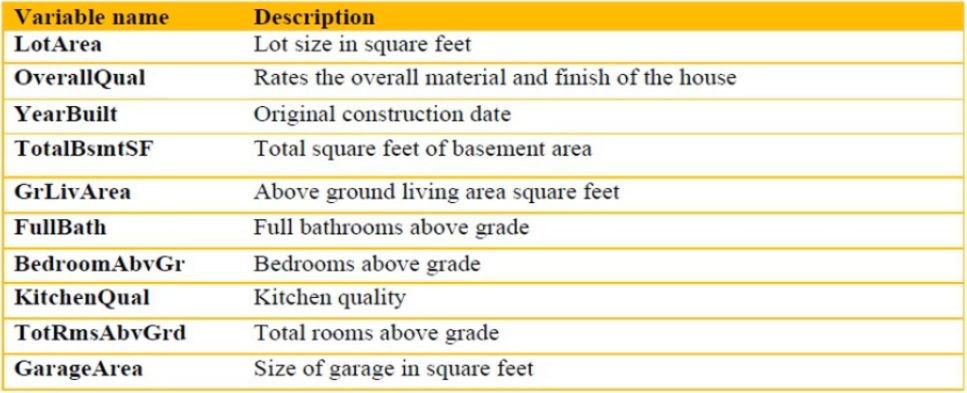

Now we look at the **shape** of this **dataframe** using the attribute **shape**:

In [3]:
df.shape

(1460, 12)

To **display** more **information** about this **dataset**, we use the funcion **info()**:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   YearBuilt     1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   GrLivArea     1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   BedroomAbvGr  1460 non-null   int64 
 8   KitchenQual   1460 non-null   object
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  GarageArea    1460 non-null   int64 
 11  SalePrice     1460 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 137.0+ KB


Here, we are interested in **Non-Null Count** which gives us an idea about the **missing values** in each variable. The second important information is the **Dtype** which tells us the **data type** for each variable. Column 8 is a **categorical variable** because the **data type** is **object**. It **cannot be analyzed** unless we **convert** it into a **numerical value** by converting it into **dummy variables**.

To check for **missing values**, we use the function **isnull()** and the function **sum()**:

In [7]:
df.isnull().sum()

Id              0
LotArea         0
OverallQual     0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
GarageArea      0
SalePrice       0
dtype: int64

In [6]:
df.isnull().any()

Id              False
LotArea         False
OverallQual     False
YearBuilt       False
TotalBsmtSF     False
GrLivArea       False
FullBath        False
BedroomAbvGr    False
KitchenQual     False
TotRmsAbvGrd    False
GarageArea      False
SalePrice       False
dtype: bool

# 2) Exploring the Dependent Varialbe

We can **display** the **descriptive statistics** for the 'sale price' column using the function **describe()**:

In [10]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 3) Understanding the Relationship between Dependent Variable and others

To explore this **relationship**, we will use the **correlation matrix**. This matrix **examines** the** **type** and **strength** of the **relationship** between the sale price and the independent variable. To **create** the **correlation matrix** we use the function **corr()**:

In [15]:
df.corr()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice
Id,1.000000,-0.033226,-0.028365,-0.012713,-0.015415,0.008273,0.005587,0.037719,0.027239,0.017634,-0.021917
LotArea,-0.033226,1.000000,0.105806,0.014228,0.260833,0.263116,0.126031,0.119690,0.190015,0.180403,0.263843
OverallQual,-0.028365,0.105806,1.000000,0.572323,0.537808,0.593007,0.550600,0.101676,0.427452,0.562022,0.790982
YearBuilt,-0.012713,0.014228,0.572323,1.000000,0.391452,0.199010,0.468271,-0.070651,0.095589,0.478954,0.522897
TotalBsmtSF,-0.015415,0.260833,0.537808,0.391452,1.000000,0.454868,0.323722,0.050450,0.285573,0.486665,0.613581
GrLivArea,0.008273,0.263116,0.593007,0.199010,0.454868,1.000000,0.630012,0.521270,0.825489,0.468997,0.708624
FullBath,0.005587,0.126031,0.550600,0.468271,0.323722,0.630012,1.000000,0.363252,0.554784,0.405656,0.560664
BedroomAbvGr,0.037719,0.119690,0.101676,-0.070651,0.050450,0.521270,0.363252,1.000000,0.676620,0.065253,0.168213
TotRmsAbvGrd,0.027239,0.190015,0.427452,0.095589,0.285573,0.825489,0.554784,0.676620,1.000000,0.337822,0.533723
GarageArea,0.017634,0.180403,0.562022,0.478954,0.486665,0.468997,0.405656,0.065253,0.337822,1.000000,0.623431


At this stage, it is a good idea to **select** the **important variables** for further analysis. We can **visualize** the **relationship** between the sale price and the four important **selected variables** using seaborn function **sns.pairplot()**.

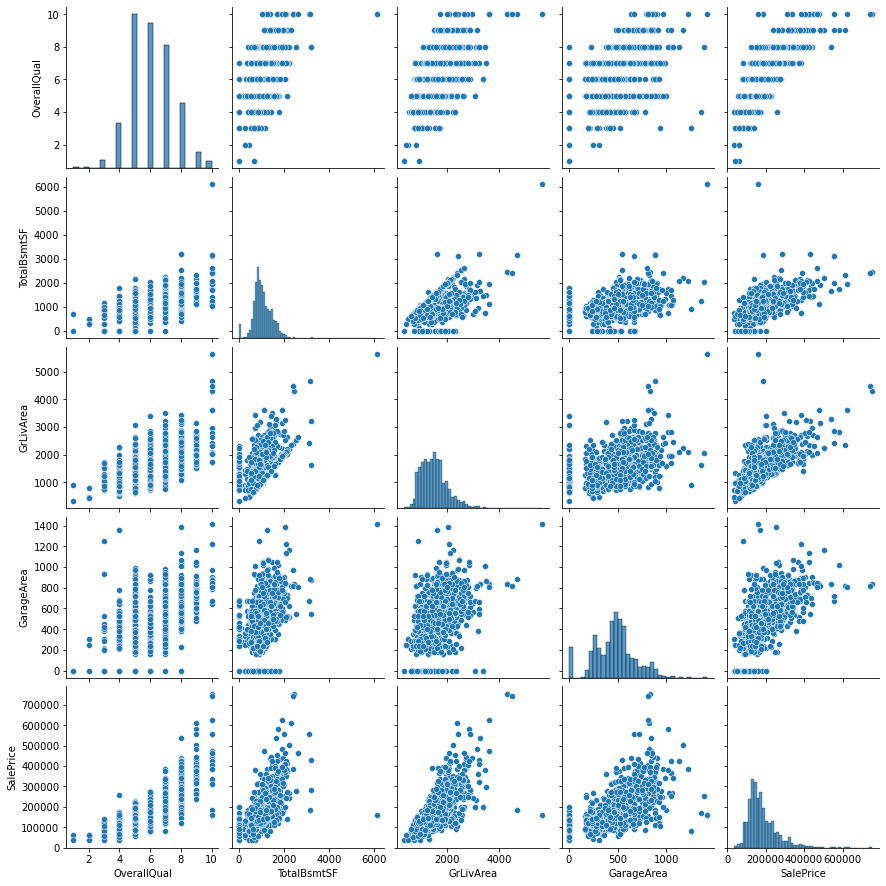

In [16]:
columns = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']
sns.pairplot(df[columns])

At this stage, we are only interested in the last four plots which represents the **relationship** between sale price and the **selected variables**.

# 4) Data cleaning

In this step, it is a good idea to **create separate plots** for **each variable**.

We can **create** a **scatter plot** between the variables 'OverallQual' and 'SalePrice' using the function **plot.scatter()**:

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

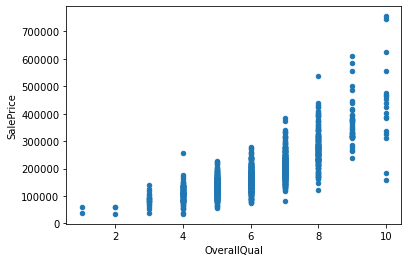

In [17]:
df.plot.scatter(x='OverallQual', y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

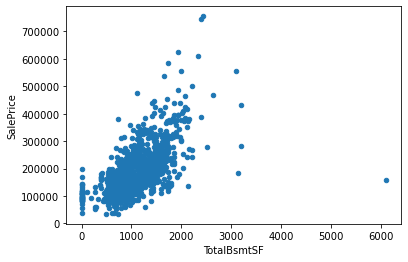

In [18]:
df.plot.scatter(x='TotalBsmtSF', y='SalePrice')

We see some outliers that don't go with the trend, so it worths to go back to the original dataset and to examine these data point carefully and trying to find out why deviate from the general trend.

In [19]:
df.loc[(df['TotalBsmtSF'] > 3000) & (df['SalePrice'] < 300000)]

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
332,333,10655,8,2003,3206,1629,2,3,Gd,7,880,284000
523,524,40094,10,2007,3138,4676,3,3,Ex,11,884,184750
1298,1299,63887,10,2008,6110,5642,2,3,Ex,12,1418,160000


In [20]:
df = df.drop([332, 523, 1298])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

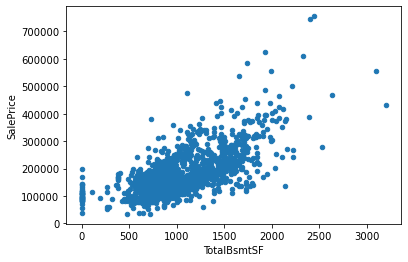

In [21]:
df.plot.scatter(x='TotalBsmtSF', y='SalePrice')

In [22]:
df['TotalBsmtSF'].corr(df['SalePrice'])

0.6529720902241525

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

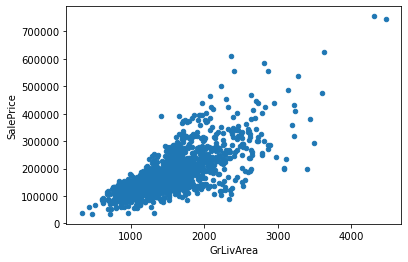

In [24]:
df.plot.scatter(x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

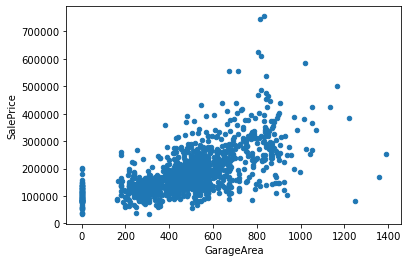

In [26]:
df.plot.scatter(x='GarageArea', y='SalePrice')

In [27]:
df.loc[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)]

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
581,582,12704,8,2008,2042,2042,2,3,Ex,8,1390,253293
1061,1062,18000,3,1935,894,894,1,2,TA,6,1248,81000
1190,1191,32463,4,1961,1249,1622,1,3,TA,7,1356,168000


In [29]:
df = df.drop([581, 1061, 1190])

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

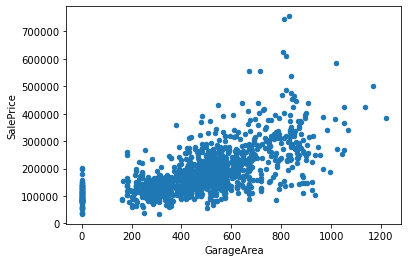

In [30]:
df.plot.scatter(x='GarageArea', y='SalePrice')

# 5.Testing Statistical Assumptions

We will beging with the **dependent variable** which is sale price and look at the **normality assumption**. To **check** for **normality** for the **variable** 'SalePrice' we can create a **histogram** and a **density plo**t using the function **histplot()**. We can **create** a **density plot** by adding the argument **kde = True**:

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

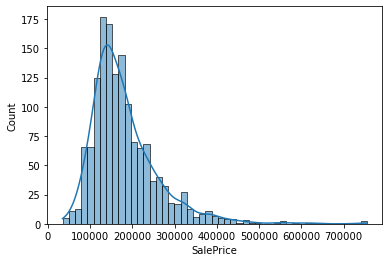

In [33]:
sns.histplot(df['SalePrice'], kde=True)

Another way to **check** for **normality** is to **create** a **probability plot** using the **scipy** function **stats.probplot()**:

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74176.35324560646, 180889.89202200828, 0.931585733830412))

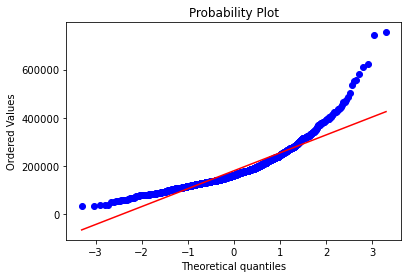

In [34]:
stats.probplot(df['SalePrice'], plot=plt)

For the data to be considered normaly distributed, the blue points need to be on the red line. Again, this test tells us that this data is not normally distributed.

What will happen if I go further with advanced statistical analysis or specific machine learning models using a variable that is not normally distributed?